# Addition of Two Numbers using ML

## Import Dependency

In [50]:
import pandas as pd

## Importing Dataset

In [51]:
data = pd.read_csv('add.csv')

In [52]:
# Print imported Dataset
data

,x,y,sum
0,1.0,1.0,2.0
1,2.0,2.0,4.0
2,4.0,4.0,8.0
3,6.0,6.0,12.0
4,7.0,7.0,14.0
5,10.0,10.0,20.0
6,14.0,14.0,28.0
7,21.0,21.0,42.0
8,24.0,24.0,48.0
9,25.3,27.7,53.0


In [53]:
# Table Head
data.head()

,x,y,sum
0,1.0,1.0,2.0
1,2.0,2.0,4.0
2,4.0,4.0,8.0
3,6.0,6.0,12.0
4,7.0,7.0,14.0


In [54]:
# Table Tail
data.tail()

,x,y,sum
14,97.4,17.3,114.7
15,65.0,49.0,114.0
16,300.0,200.0,500.0
17,216.0,118.0,334.0
18,287.0,312.0,599.0


In [55]:
# Rows and Columns
data.shape

(19, 3)

## Start Machine Learning Steps

1. Preprocess, EDA, Feature Selection
2. Extract input and output columns
3. Scale the values
4. Train-test Split
5. Train the model
6. Evaluate the model / Model Selection
7. Deploy the model

## 1. Preprocessing

In [56]:
# Checking null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       19 non-null     float64
 1   y       19 non-null     float64
 2   sum     19 non-null     float64
dtypes: float64(3)
memory usage: 584.0 bytes


### EDA

In [57]:
import matplotlib.pyplot as plt

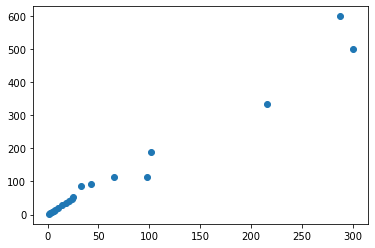

In [58]:
plt.scatter(data['x'], data['sum'])

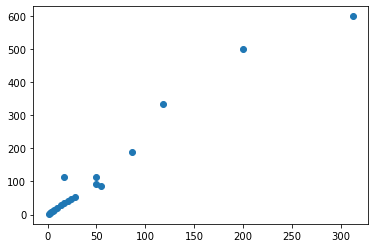

In [59]:
plt.scatter(data['y'], data['sum'])

Identify the patterns and decide the algorithm (Initial Decision):

Linear Regression

In [60]:
# Store feature Matrix in X and Response (Target) in Vector y
X = data[['x', 'y']]
y = data['sum']

## 4. Train / Test Split

This is to evaluate the performance of the model.
1. Split the data into two parts(Training set and testing set)
2. Train the model on the training set
3. Test the model on the testing set

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [66]:
X_train

,x,y
13,102.0,86.0
15,65.0,49.0
17,216.0,118.0
2,4.0,4.0
9,25.3,27.7
18,287.0,312.0
4,7.0,7.0
12,43.0,49.0
7,21.0,21.0
10,18.3,16.4


## 5. Train the model

In [67]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 6. Evaluate the model / Model Selection

In [72]:
# Model’s Prediction performance
model.score(X_train, y_train)

1.0

In [73]:
model.score(X_test, y_test)

1.0

In [74]:
# Compare the results
y_pred = model.predict(X_test)

In [75]:
y_pred

array([  2. ,  20. ,  87.7,   4. ,  48. , 500. ,  12. ])

In [76]:
# Compare using a data frame
df = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred})

In [77]:
df

,Actual,Prediction
0,2.0,2.0
5,20.0,20.0
11,87.7,87.7
1,4.0,4.0
8,48.0,48.0
16,500.0,500.0
3,12.0,12.0


In [78]:
# Prediction on new sample
model.predict([[27, 112]])

C:\Users\PARADOCX\anaconda3\envs\ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([139.])

In [79]:
model.predict([[220, 480]])

C:\Users\PARADOCX\anaconda3\envs\ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([700.])

## 7. Deploy the model

In [83]:
# Save the model using joblib or pickel
import joblib as jbl

In [84]:
jbl.dump(model, 'model_joblib')

['model_joblib']

In [86]:
# Load the model
model = jbl.load('model_joblib')

In [87]:
model.predict([[220, 480]])

C:\Users\PARADOCX\anaconda3\envs\ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([700.])

In [88]:
# Training for the entire data set
X = data[['x', 'y']]
y = data['sum']

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [89]:
# Save the model
import joblib

joblib.dump(model, 'model_joblib')
model = joblib.load('model_joblib')

model.predict([[100, 50]])

C:\Users\PARADOCX\anaconda3\envs\ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([150.])

### GUI

In [92]:
from tkinter import *
import joblib

In [93]:
master = Tk()

master.title("Addition of Two Numbers using ML")
Label(
    master,
    text="Addition of Two Numbers using ML",
    bg='black', fg='white').grid(row=0, columnspan=2)
Label(master, text="Enter First Number").grid(row=1)
Label(master, text="Enter Second Number").grid(row=2)

e1 = Entry(master)
e2 = Entry(master)
e1.grid(row=1, column=1)
e2.grid(row=2, column=1)


def show_entry_fields():
    p1 = float(e1.get())
    p2 = float(e2.get())

    md = joblib.load('model_joblib')
    result = md.predict([[p1, p2]])

    Label(master, text='sum is = ').grid(row=4)
    Label(master, text=result).grid(row=5)
    print("sum is", result)


Button(master, text='predict', command=show_entry_fields).grid()

mainloop()

C:\Users\PARADOCX\anaconda3\envs\ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


sum is [7000.]
